In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-news/submit.csv
/kaggle/input/fake-news/train.csv
/kaggle/input/fake-news/test.csv


In [86]:
## Data Analysis packages
import numpy as np
import pandas as pd

## Data Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib
%matplotlib inline
from pylab import rcParams
import missingno as msno
import os

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.metrics import *


In [87]:
train_df=pd.read_csv("/kaggle/input/fake-news/train.csv")
train_df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [88]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


<Axes: >

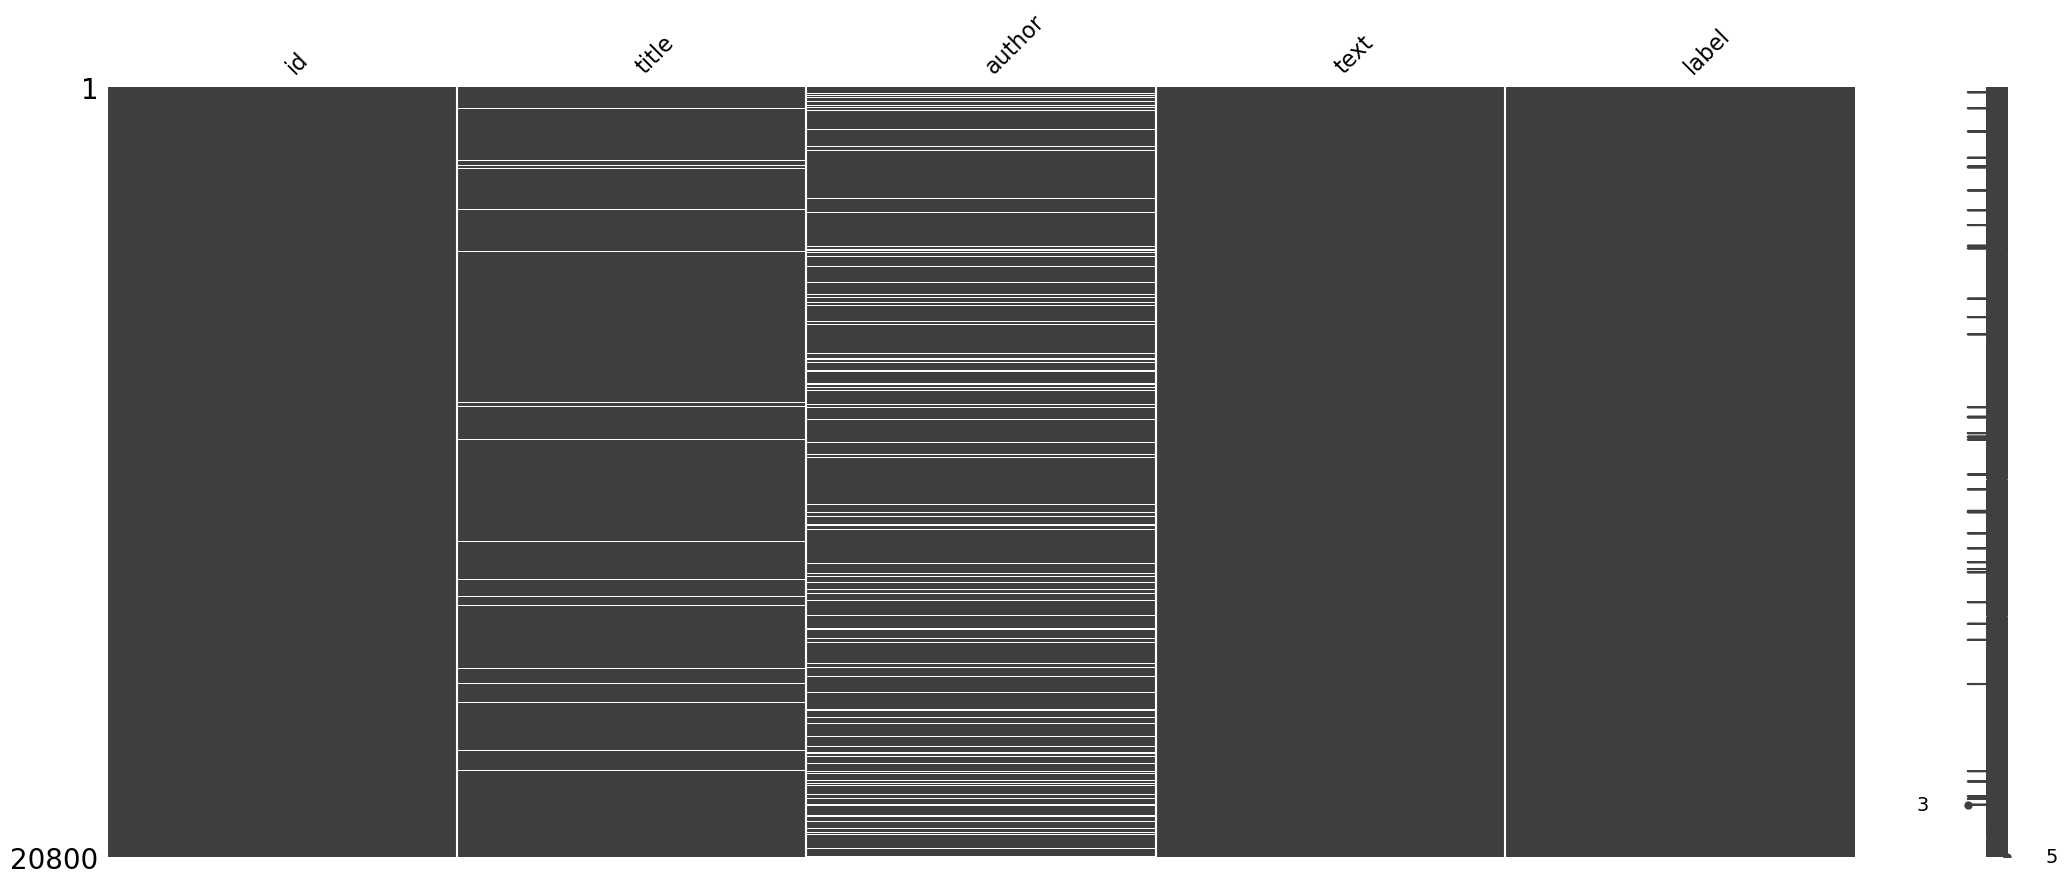

In [89]:
##Visualize missing values (NaN) values using Missingno Library
msno.matrix(train_df)

In [90]:
train_df.duplicated().sum()

0

In [91]:
#checking the null valus
train_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [92]:
# Drop Missing Values
train_df.dropna(inplace=True)


In [93]:
#To reset the Index Values
train_df.reset_index(inplace=True)
train_df.shape

(18285, 6)

In [94]:
## Get the Independent and dependent Features

X=train_df.drop('label',axis=1)
y=train_df['label']

In [95]:
print(f"X is {X.shape}")
print(f"Y is {y.shape}")

X is (18285, 5)
Y is (18285,)


In [96]:
train_df["label"].value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [97]:
train_df.corr()

/tmp/ipykernel_28/1233823885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,index,id,label
index,1.000000,1.000000,0.003403
id,1.000000,1.000000,0.003403
label,0.003403,0.003403,1.000000


/tmp/ipykernel_28/647286864.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")


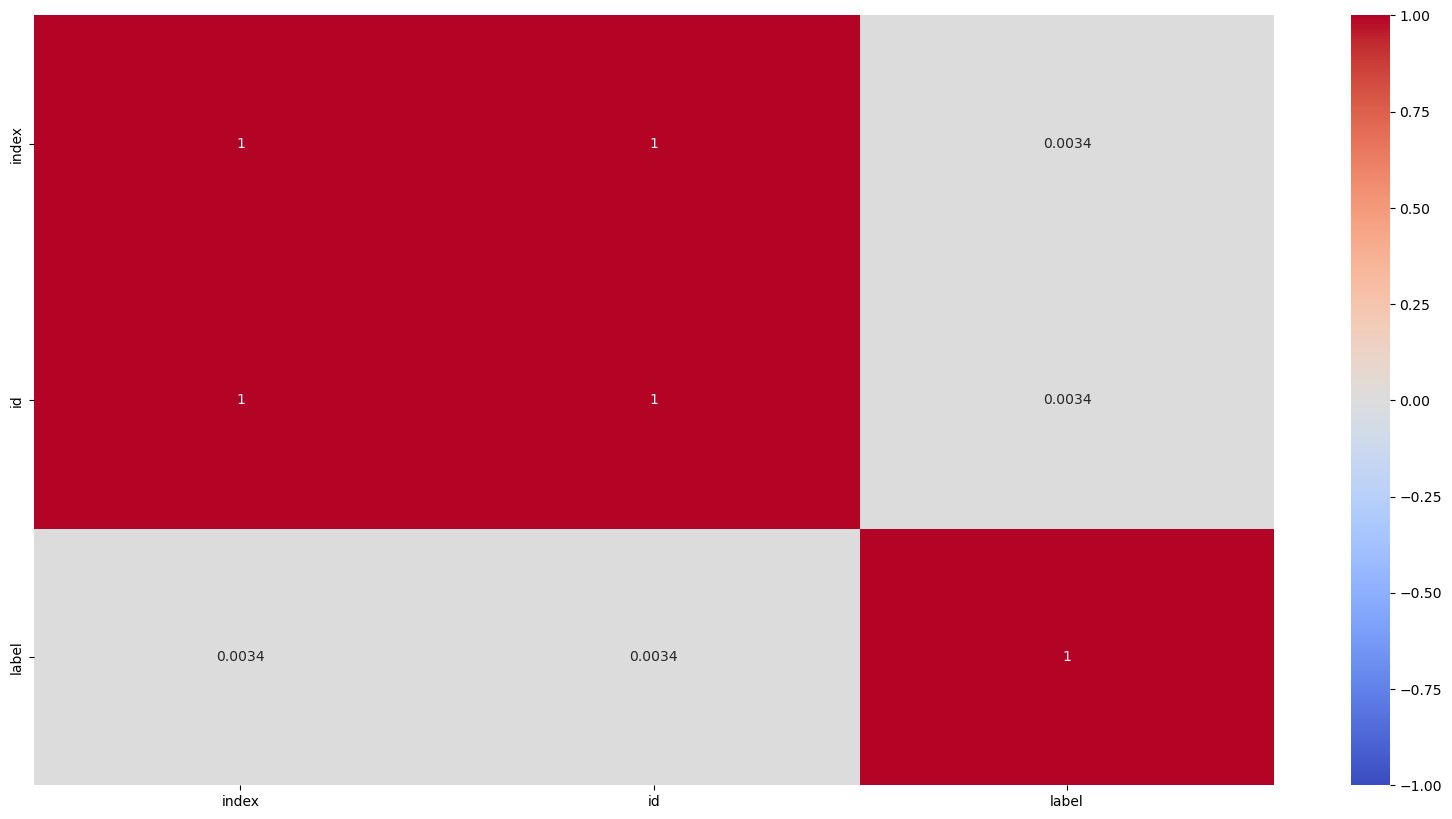

In [98]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

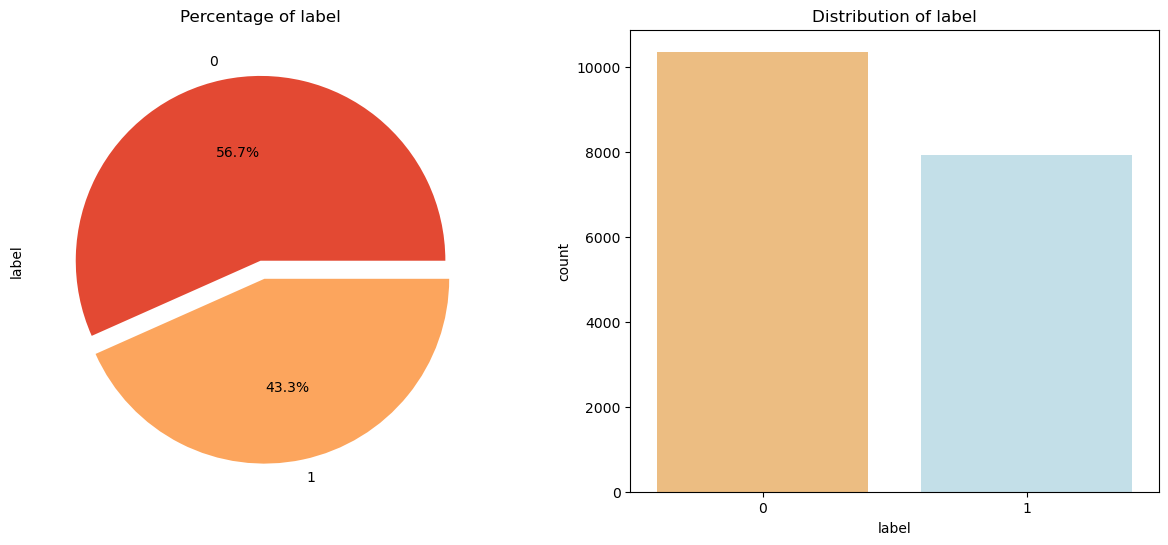

In [99]:

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
train_df['label'].value_counts().plot.pie(explode=[0,0.1],colors = sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of label')
sns.countplot(x='label',data=train_df,ax=ax2,palette='RdYlBu')
ax2.set_title('Distribution of label')
plt.show();

# Onehot Representation

In [100]:
msz=X.copy()
msz['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [101]:
# Import Libraries for NLP 
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


# Data Preprocessing

In [102]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(msz)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', msz['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [103]:
voc_size=7000
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[2166, 972, 5382, 1894, 1422, 5128, 372, 3486, 5761, 4410],
 [5975, 3196, 5060, 2894, 4743, 5361, 3695],
 [5418, 4620, 2684, 6781],
 [3947, 685, 631, 6974, 413, 71],
 [189, 4743, 4469, 5312, 170, 3115, 4743, 2794, 2838, 1496],
 [4615,
  604,
  6735,
  402,
  4507,
  2651,
  1902,
  5736,
  6017,
  507,
  1547,
  1860,
  2318,
  2764,
  3695],
 [282, 6410, 1291, 1542, 5478, 2908, 5410, 5210, 405, 1934, 127],
 [3454, 3196, 4320, 6043, 902, 5657, 2651, 3025, 405, 1934, 127],
 [801, 5558, 1620, 5013, 6772, 4544, 4804, 5001, 2651, 5875],
 [4341, 1028, 6057, 2224, 4859, 5711, 5307, 2607],
 [3597, 2645, 1333, 3444, 274, 1154, 6584, 2664, 3141, 6434, 1276],
 [6974, 5727, 1422, 4544, 2651, 902],
 [1896, 2257, 2904, 956, 2597, 5235, 4709, 3024, 568],
 [5805, 6758, 5578, 6503, 2305, 3462, 4458, 405, 1934, 127],
 [414, 6908, 6928, 1132, 2858, 405, 1934, 127],
 [4779, 6234, 1328, 4141, 687, 1479, 1972, 4087, 6970, 2737],
 [6842, 344, 3196],
 [3195, 5815, 5349, 547, 2651, 1299, 4322, 3695],
 [2244,

In [104]:
# onehot_repr = [one_hot(words, voc_size) for words in corpus]
# Embedding Representation
sent_length=20
padded_data=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(padded_data)

[[   0    0    0 ... 3486 5761 4410]
 [   0    0    0 ... 4743 5361 3695]
 [   0    0    0 ... 4620 2684 6781]
 ...
 [   0    0    0 ...  405 1934  127]
 [   0    0    0 ... 4328 2028 3477]
 [   0    0    0 ... 3328 4900 3532]]


In [105]:
padded_data[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2166,
        972, 5382, 1894, 1422, 5128,  372, 3486, 5761, 4410], dtype=int32)

In [106]:
len(padded_data),y.shape

(18285, (18285,))

In [107]:
import numpy as np
X_final=np.array(padded_data)
y_final=np.array(y)

In [108]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [110]:
X_train.shape


(12250, 20)

In [115]:
y_test.size

6035

# Simple LSTM

In [113]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)
y_pred= (model.predict(X_test) > 0.5).astype("int32")

print(f"accuracy_score----->{accuracy_score(y_test,y_pred)}")
print(f"confusion_matrix---->{confusion_matrix(y_test,y_pred)}")
print(f"classification_report{classification_report(y_test, y_pred, labels=[0,1])}")



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 20, 40)            280000    
                                                                 
 lstm_10 (LSTM)              (None, 100)               56400     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 336,501
Trainable params: 336,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
192/192 [==============================] - 14s 62ms/step - loss: 0.3327 - accuracy: 0.8472 - val_loss: 0.1886 - val_accuracy: 0.9190
Epoch 2/10
192/192 [==============================] - 3s 14ms/step - loss: 0.1311 - accuracy: 0.9484 - val_loss: 0.1889 - val_accuracy: 0.9223
Epoch 3/10
192/192 

# Adding dropout layers to the model 

In [120]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)
y_pred= (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import *
print(f"accuracy_score----->{accuracy_score(y_test,y_pred)}")
print(f"confusion_matrix---->{confusion_matrix(y_test,y_pred)}")
print(f"classification_report{classification_report(y_test, y_pred, labels=[0,1])}")

Epoch 1/10
192/192 [==============================] - 14s 58ms/step - loss: 0.3495 - accuracy: 0.8411 - val_loss: 0.1924 - val_accuracy: 0.9165
Epoch 2/10
192/192 [==============================] - 4s 20ms/step - loss: 0.1445 - accuracy: 0.9411 - val_loss: 0.1864 - val_accuracy: 0.9211
Epoch 3/10
192/192 [==============================] - 3s 15ms/step - loss: 0.0985 - accuracy: 0.9634 - val_loss: 0.1952 - val_accuracy: 0.9253
Epoch 4/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0662 - accuracy: 0.9771 - val_loss: 0.2268 - val_accuracy: 0.9210
Epoch 5/10
192/192 [==============================] - 2s 12ms/step - loss: 0.0469 - accuracy: 0.9841 - val_loss: 0.2906 - val_accuracy: 0.9200
Epoch 6/10
192/192 [==============================] - 3s 13ms/step - loss: 0.0333 - accuracy: 0.9891 - val_loss: 0.2877 - val_accuracy: 0.9118
Epoch 7/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0229 - accuracy: 0.9928 - val_loss: 0.3730 - val_accuracy: 0.911

# Stacked Lstm

In [116]:
### Finally Training
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)
y_pred= (model.predict(X_test) > 0.5).astype("int32")

print(f"accuracy_score----->{accuracy_score(y_test,y_pred)}")
print(f"confusion_matrix---->{confusion_matrix(y_test,y_pred)}")
print(f"classification_report{classification_report(y_test, y_pred, labels=[0,1])}")

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 20, 40)            280000    
                                                                 
 lstm_12 (LSTM)              (None, 20, 100)           56400     
                                                                 
 lstm_13 (LSTM)              (None, 100)               80400     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 416,901
Trainable params: 416,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
192/192 [==============================] - 17s 65ms/step - loss: 0.3353 - accuracy: 0.8353 - val_loss: 0.1858 - val_accuracy: 0.9218
Epoch 2/10
192/192 [==========

# Hyperparameter tunning odf Stacked Lstm or with dropout

In [122]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)
y_pred= (model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import *
print(f"accuracy_score----->{accuracy_score(y_test,y_pred)}")
print(f"confusion_matrix---->{confusion_matrix(y_test,y_pred)}")
print(f"classification_report{classification_report(y_test, y_pred, labels=[0,1])}")

Epoch 1/10
192/192 [==============================] - 18s 71ms/step - loss: 0.3221 - accuracy: 0.8448 - val_loss: 0.1868 - val_accuracy: 0.9203
Epoch 2/10
192/192 [==============================] - 4s 21ms/step - loss: 0.1384 - accuracy: 0.9456 - val_loss: 0.2084 - val_accuracy: 0.9191
Epoch 3/10
192/192 [==============================] - 3s 14ms/step - loss: 0.0974 - accuracy: 0.9650 - val_loss: 0.2179 - val_accuracy: 0.9220
Epoch 4/10
192/192 [==============================] - 3s 17ms/step - loss: 0.0729 - accuracy: 0.9740 - val_loss: 0.2359 - val_accuracy: 0.9163
Epoch 5/10
192/192 [==============================] - 3s 13ms/step - loss: 0.0564 - accuracy: 0.9814 - val_loss: 0.2617 - val_accuracy: 0.9152
Epoch 6/10
192/192 [==============================] - 3s 16ms/step - loss: 0.0426 - accuracy: 0.9871 - val_loss: 0.2893 - val_accuracy: 0.9107
Epoch 7/10
192/192 [==============================] - 3s 17ms/step - loss: 0.0370 - accuracy: 0.9884 - val_loss: 0.3322 - val_accuracy: 0.914

# Bidirectional LSTM 

In [118]:
from tensorflow.keras.layers import Bidirectional
## Creating model and training model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)
y_pred= (model.predict(X_test) > 0.5).astype("int32")

print(f"accuracy_score----->{accuracy_score(y_test,y_pred)}")
print(f"confusion_matrix---->{confusion_matrix(y_test,y_pred)}")
print(f"classification_report{classification_report(y_test, y_pred, labels=[0,1])}")

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 20, 40)            280000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dense_13 (Dense)            (None, 1)                 201       
                                                                 
Total params: 393,001
Trainable params: 393,001
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
192/192 [==============================] - 16s 63ms/step - loss: 0.2960 - accuracy: 0.8601 - val_loss: 0.1900 - val_accuracy: 0.9220
Epoch 2/10
192/192 [==============================] - 6s 30ms/step - loss: 0.1278 - accuracy: 0.